Loading libraries

In [62]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Mounted at /content/gdrive


Plotting some images from the dataset

The first 16 examples in the train dataset:


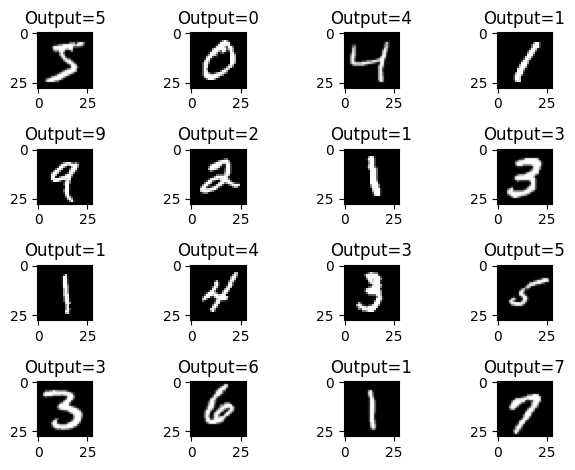

In [63]:
fig, axis = plt.subplots(4,4)
for i in range(16):
  axis[i//4, i%4].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
  axis[i//4, i%4].title.set_text("Output="+str(y_train[i]))
fig.tight_layout()
print("The first 16 examples in the train dataset:")
fig.show()

Making the model
(Inspiration from LeNet-5)

In [74]:
def model(x_shape):
  input_img=tf.keras.Input(x_shape[1:]+(1,), dtype=tf.float32)
  A=tfl.Conv2D(4, (5,5))(input_img)                   #Size of A is (m,24,24,4)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,12,12,4)
  A=tfl.Conv2D(12, (5,5))(A)                          #Size of A is (m,8,8,12)
  A=tfl.AveragePooling2D((2,2), (2,2))(A)             #Size of A is (m,4,4,12)
  A=tfl.Flatten()(A)                                  #Size of A is (m,4*4*12)
  A=tfl.Dense(10, activation='softmax')(A)
  return tf.keras.Model(input_img, A)

mymodel=model(x_train.shape)


Training the model

In [ ]:
opt=tf.keras.optimizers.Adam()
mymodel.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
x_train1=tf.cast(tf.expand_dims(x_train, axis=3), tf.float32)
y_train1=tf.one_hot(y_train, 10)
x_test1=tf.cast(tf.expand_dims(x_test, axis=3), tf.float32)
y_test1=tf.one_hot(y_test, 10)

Note: When I used learning rate = 0.01, the accuracy and loss kept increasing and decreasing regularly due to overshooting of the values in some other direction. Thus I changed the rate to the default of 0.001.

I trained the model with batch size 64 for a total of 20 epochs. After each epoch, I also predicted the test set accuracy and loss. I used the following code to do so.

```
train_loss_list=[]
train_accuracy_list=[]
test_loss_list=[]
test_accuracy_list=[]

for i in range(20):
  checkpoint_path = "/content/gdrive/MyDrive/MNIST Load & Classify Digits Chechpoint"+str(i+1)+".h5"
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path)
  history=mymodel.fit(x_train1, y_train1, batch_size=64, epochs=1, callbacks=[checkpoint_callback])
  
  test_loss, test_accuracy = mymodel.evaluate(x_test1, y_test1)

  train_loss_list.append(history.history['loss'][0])
  train_accuracy_list.append(history.history['accuracy'][0])
  test_loss_list.append(test_loss)
  test_accuracy_list.append(test_accuracy)
```

The following code was used to plot the graph:


```
fig, axis = plt.subplots(2,2)
axis[0,0].plot(list(range(1,21)), train_accuracy_list)
axis[0,0].set_xlabel("Epochs")
axis[0,0].set_ylabel("Train Accuracy")
axis[0,1].plot(list(range(1,21)), train_loss_list)
axis[0,1].set_xlabel("Epochs")
axis[0,1].set_ylabel("Train Loss")
axis[1,0].plot(list(range(1,21)), test_accuracy_list)
axis[1,0].set_xlabel("Epochs")
axis[1,0].set_ylabel(" Test Accuracy")
axis[1,1].plot(list(range(1,21)), test_loss_list)
axis[1,1].set_xlabel("Epochs")
axis[1,1].set_ylabel("Test Loss")
fig.tight_layout()
fig.show()
```



The plotted graphs are as follows.
![picture](https://drive.google.com/uc?export=view&id=1rSs_Om_gg6mxo6KDYrZ8O9WHXEe-m5l4)

The conclusion was that the best model was the one which was trained after 19 epochs, due to possible overfitting after that. A slight dip in train set accuracy and a slight rise in train set loss iss seen between 19th and 20th epoch. There is a similar observation for test set as well.

Thus, I have saved that model.

Saving the trained parameters

In [86]:
final_model=tf.keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/MNIST Load & Classify Digits Chechpoint19.h5")

The final losses and accuracies are:
*   Train set accuracy: 0.9100
*   Train set loss: 0.3194
*   Test set accuracy: 0.9148
*   Test set loss: 0.3119

Testing my own picture

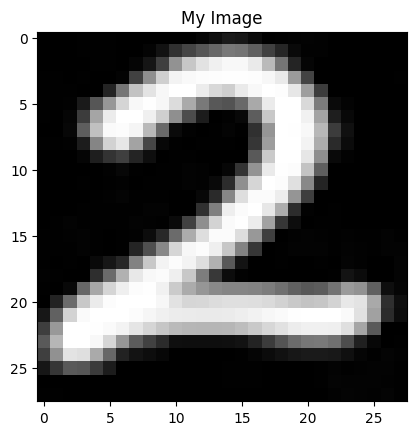

1/1 [==============================] - 0s 22ms/step
Predicted output: 2


In [111]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
image_path = '/content/gdrive/MyDrive/Colab Notebooks/MNIST Load and Classify Digits MyImg.png'
img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('My Image')
plt.show()



# Convert the image to a NumPy array
img_array = img_to_array(img)
img_array = tf.cast(tf.expand_dims(img_array, axis=2), tf.float32)
my_img_output = final_model.predict(tf.expand_dims(img_array, axis=0))
output = int(tf.math.argmax(my_img_output[0]))
print("Predicted output:", output)